# Spatially Enabled Data Frames

<img src="./img/title_image.jpg"/>

## Overview 

- Pandas data frames 
- Custom namespace on Series and DataFrame objects
    + `geom` on Series
    
    ```python
    >>> df['SHAPE'].geom.area
    ```
    
    + `spatial` on the the DataFrame
    
    ```python
    >>> df.spatial.project(4326)
    ```

- Cross platform spatial analysis
    + Mac, Linux, and Windows

- Multi-geometry engine support

    + Esri Arcpy's Engine
    + Shapely/Geos
    
- Read/write data

    + Fiona, shapefile, and arcpy

## Getting Started

It starts with two imports

In [1]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

- Loads Pandas
- The `GeoAccessor` and `GeoSeriesAccessor` load the namespaces into Pandas

### Data I/O

#### Consumption

- Feature Layers
- Data Frames
- Feature classes

```python

    from arcgis.features import FeatureLayer
    fl = FeatureLayer(("https://services2.arcgis.com/zPFLSOZ5HzUzzTQb/arcgis"
                       "/rest/services/CensusBlockGroup/FeatureServer/0"))
    sdf1 = pd.DataFrame.spatial.from_layer(fl)
    sdf2 = pd.DataFrame.spatial.from_featureclass("./data/historic_traffic.shp")
    df_earthquakes = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.csv")
    sdf3 = pd.DataFrame.spatial.from_xy(df=df_earthquakes, 
                                        x_column="longitude", 
                                        y_column="latitude", 
                                        sr=4326)
```

#### Persistence of Data

- Tables
- Feature Classes
- Services

```python
    item = gis.content.import_data(df=sdf1, title="CensusBlockGroup")
    sdf1.spatial.to_featureclass(location="./data/stage.gdb/census")
```

## Mapping

- Provides a rich visualization of data
- Data does not have to exist on an Enterprise
- Map both local and service data

### Simple Rendering of Data

- Simple renders can be circles, squares, solid colors, etc...
- Single color only

In [2]:
from arcgis.gis import GIS
gis = GIS(profile='your_online_profile', verify_cert=False)

In [3]:
first_map = gis.map('New York, NY')
first_map.basemap = 'streets'
first_map

MapView(layout=Layout(height='400px', width='100%'))

In [4]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]
df = flayer.query(where="AGE_45_54 < 1500", as_df=True)

In [5]:
df.spatial.plot(map_widget=first_map)

True

### Advanced Simple Rendering


In [6]:
m2 = gis.map('United States')
m2.zoom = 3
m2

MapView(layout=Layout(height='400px', width='100%'), zoom=3.0)

In [7]:
m2.center = [39,-98]
df.spatial.plot(map_widget=m2,
            symbol_type='simple',
            symbol_style='d', # d - for diamonds
            colors='Reds_r',
            cstep=10,
            outline_color='Blues',
            marker_size=10)

True

### Class Break Renderer

In [8]:
m3 = gis.map('Reno, NV', zoomlevel=4)
m3.center = [39,-98]
m3

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [9]:
df.spatial.plot(map_widget = m3,
                renderer_type='u', # specify the unique value renderer using its notation 'u'
                col='ST'  # column to get unique values from
               )

True

### Class Break Renderer


In [10]:
m4 = gis.map('Reno, NV', zoomlevel=4)
m4.center = [39,-98]
m4

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [11]:
df.spatial.plot(map_widget=m4,
               renderer_type='c',  # for class breaks renderer
               method='esriClassifyNaturalBreaks',  # classification algorithm
               class_count=20,  # choose the number of classes
               col='POPULATION',  # numeric column to classify
               cmap='gnuplot2_r',  # color map to pick colors from for each class
               alpha=1  # specify opacity
               )

True

In [12]:
m4.legend = True

### Rendering Polygon Example


In [13]:
from arcgis.features import FeatureLayer
fl = FeatureLayer("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0")
#("https://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2")
county_sdf = fl.query("STATE_NAME='Washington'", out_sr=4326, as_df=True)
county_sdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,SHAPE,SQMI,STATE_FIPS,STATE_NAME,Shape_Area,Shape_Leng,Shape__Area,Shape__Length,VACANT,WHITE
0,1647,1649,1261,2498,2199,2040,1693,1811,1048,603,...,"{'rings': [[[-119.371226112965, 46.73393058681...",1930.08,53,Washington,0.591166,3.803975,1.073791e+10,475545.422075,522,11703
1,1273,1395,1188,2413,2310,3186,3090,1335,2310,1346,...,"{'rings': [[[-116.919132413661, 45.99517550749...",640.61,53,Washington,0.191814,2.032057,3.433711e+09,269259.106078,636,20392
2,13350,12914,10955,23038,21734,25067,21381,13081,11515,6293,...,"{'rings': [[[-118.98213281065, 45.999058375669...",1759.64,53,Washington,0.534315,3.217555,9.572816e+09,434419.310124,3314,144418
3,247,230,158,348,422,630,693,197,527,265,...,"{'rings': [[[-117.602826222726, 46.00026820720...",873.57,53,Washington,0.261828,2.489179,4.695958e+09,339652.267019,374,3791
4,2956,2895,2192,4704,4660,5276,4670,2832,3038,1709,...,"{'rings': [[[-120.004889911894, 47.22117809059...",1848.70,53,Washington,0.570914,4.342304,1.051979e+10,580469.298956,2110,30573


In [14]:
m5 = gis.map('Seattle, WA', zoomlevel=6)
m5.basemap = 'dark-gray-vector'
m5

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)

In [15]:
county_sdf.spatial.plot(map_widget=m5,
                        renderer_type='c',  
                        method='esriClassifyNaturalBreaks',  
                        class_count=7,  
                        col='AGE_20_24', 
                        cmap='RdPu',  
                        alpha=0.8,
                        line_width=.25)

True

#### Help Functions

- How do we know what colormaps to use?

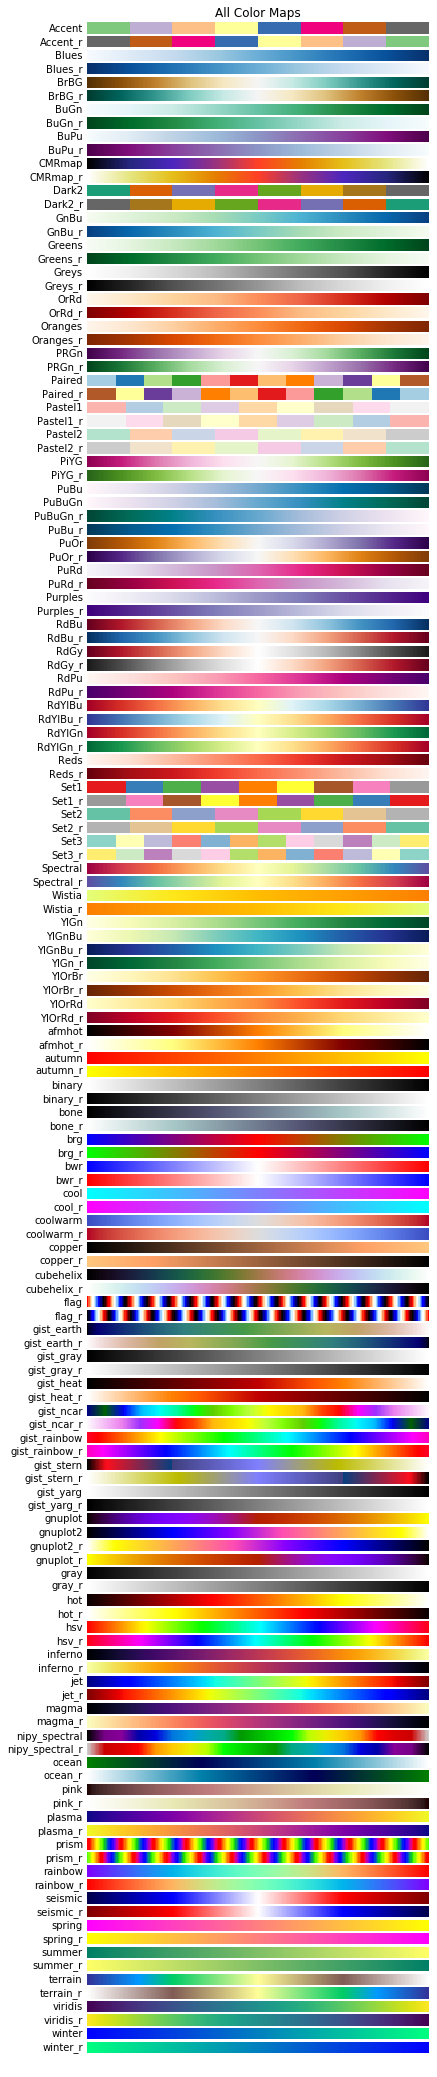

In [16]:
from arcgis.mapping import display_colormaps
display_colormaps()

## Spatial Index

- Quickly find spatial locations 
    + generalized locations
- Based on Minimum bounding rectangles

### Index Visualized

<img src="./img/spatial_index_viz.png" />

### Spatial Index Example

<Item title:"USA Major Cities" type:Feature Layer Collection owner:esri_dm>
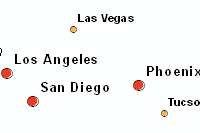

In [17]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
item

In [18]:
sdf = item.layers[0].query(as_df=True, out_sr=4326) # Major US Cities

In [19]:
index = sdf.spatial.sindex(stype='quadtree')

In [20]:
nj_cities = index.intersect((-75.55956796790353, 38.928522146813044, 
                             -73.9024505439044, 41.35763612214295))

In [21]:
m6 = gis.map("New Jersey")
m6

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
sdf.iloc[nj_cities].spatial.plot(m6)

True

#### Notice the Following

- The bounding box returns locations outside of New Jersey
    + This means the the selction by location is **generalized**
    

## Spatial Analysis

<img src="./img/analysis_china.jpg"/>

- We have data, but how to we gain insights into the data?
- Python API provides a wealth of vector based analytics

### Using Geoprocessing Tools

- The work horse of analysis
- Service provide tools not available in the standard libary

In [23]:
from arcgis import create_viewshed
sub_sdf = sdf.iloc[[2981, 2982, 2983, 2984]]

In [24]:
vs = create_viewshed(input_layer=sub_sdf.spatial.to_feature_collection(), 
                     maximum_distance=20, 
                     max_distance_units="Miles")

In [25]:
m7 = gis.map('South Charleston, West Virginia', zoomlevel=11)
m7.basemap = 'dark-gray-vector'
m7

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)

In [26]:
m7.add_layer(vs)
sub_sdf.spatial.plot(m7,
                    symbol_type='simple',
                    symbol_style='d', # d - for diamonds
                    colors='Reds_r',
                    cstep=20,
                    outline_color='Blues',
                    marker_size=20)

True

### Using GeoEnrichment 

<img src="./img/enrichment_talk.jpeg"/>

- Provides insights into a location or area
- Uses credits
- Driven heavily on SeDF

In [27]:
from arcgis.geoenrichment import enrich
enrich_df = enrich(study_areas=sub_sdf, data_collections=['Age'] )
enrich_df.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,VACANT,WHITE,aggregationMethod,apportionmentConfidence,areaType,bufferRadii,bufferUnits,bufferUnitsAlias,populationToPolygonSizeRating,sourceCountry
0,544,626,702,1245,1357,1406,1359,575,1006,797,...,666,10040,BlockApportionment:US.BlockGroups,2.576,RingBuffer,1,esriMiles,Miles,2.191,US
1,1350,1490,1368,2893,2691,3263,2957,1401,1855,1518,...,1539,19365,BlockApportionment:US.BlockGroups,2.576,RingBuffer,1,esriMiles,Miles,2.191,US
2,689,774,697,1436,1422,2106,1967,666,1189,923,...,930,11030,BlockApportionment:US.BlockGroups,2.576,RingBuffer,1,esriMiles,Miles,2.191,US
3,2154,2295,2934,6396,4644,4213,3068,2423,1663,1017,...,1457,14048,BlockApportionment:US.BlockGroups,2.576,RingBuffer,1,esriMiles,Miles,2.191,US


In [28]:
m8 = gis.map('South Charleston, West Virginia', zoomlevel=11)
m8.basemap = 'dark-gray'
m8

MapView(layout=Layout(height='400px', width='100%'), zoom=11.0)

In [29]:
enrich_df.spatial.plot(m8)

True

### On to Custom Analysis

- Besides the built in tool SeDF allows for complete customize of analysis process


In [30]:
df = pd.read_csv("./data/listings.csv")
df.head()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-dev\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


#### Examining the Review Scores

In [31]:
ratings = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
          'review_scores_value', 'latitude', 'longitude']
df[ratings].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude
count,17391.000000,17381.000000,17383.000000,17369.000000,17378.000000,17370.000000,17371.000000,20030.000000,20030.000000
mean,94.849520,9.679765,9.465627,9.735563,9.785361,9.421531,9.175004,52.365212,4.888977
std,6.648685,0.685271,0.867973,0.646557,0.599409,0.727931,0.805422,0.015996,0.035573
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,52.288378,4.753247
25%,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,52.355126,4.863595
50%,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,52.364590,4.886387
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,52.375074,4.908288
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,52.424713,5.027689


In [32]:
data = df[~df['review_scores_value'].isna()].copy().reset_index(drop=True)
sdf_airbnb = pd.DataFrame.spatial.from_xy(df=data, y_column='latitude', x_column='longitude', sr=4326)

In [33]:
sdf_airbnb.spatial.full_extent

(4.763264201049322, 52.2892744181358, 5.027688954448574, 52.42471256156165)

In [34]:
m10 = gis.map()
m10.extent = sdf_airbnb.spatial.full_extent
m10

MapView(layout=Layout(height='400px', width='100%'))

#### K-Means Clustering

- Unsupervised learning  technique
    + finds hidden structures in data when we don't know the answer upfront


In [35]:
from sklearn import cluster

- Remove and NaN or NULL value from the columns of interest
- Convert price from string to numeric
- Select only 'Entire home/apt' 

In [36]:
q = (sdf_airbnb['room_type'] == 'Entire home/apt') & (sdf_airbnb['beds'] >=4)

sdf_airbnb = (sdf_airbnb
              .loc[q]
              .dropna(axis=0, subset=ratings)
              .copy()
              .reset_index(drop=True))

sdf_airbnb['RENTALPRICE'] = (sdf_airbnb
                                    .price
                                    .str
                                    .replace("$", "")
                                    .str.replace(",","")
                             .apply(float))

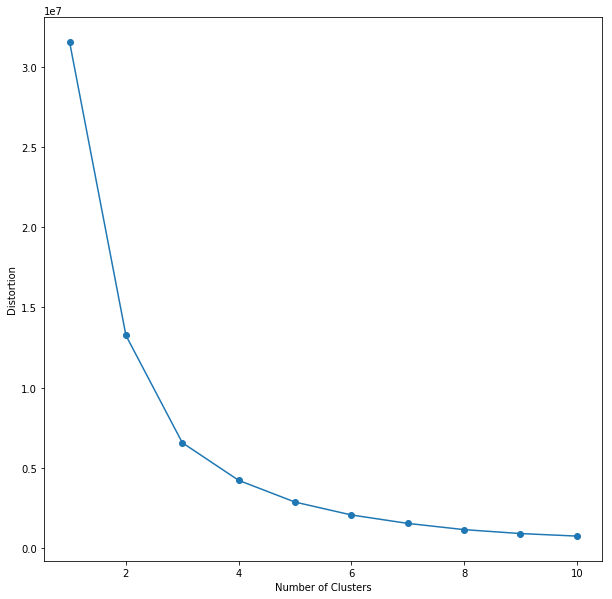

In [37]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
    km.fit(sdf_airbnb[['RENTALPRICE']])
    distortions.append(km.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [38]:
kmeans5 = cluster.KMeans(n_clusters=4,
                        init='random',
                        n_init=10,
                        max_iter=300,
                        random_state=0)
k5cls = kmeans5.fit_predict(sdf_airbnb[['RENTALPRICE']])
sdf_airbnb['class'] = k5cls

In [39]:
display_columns = ['SHAPE', 'class', 'name', 'summary', "price"]

In [40]:
m11 = gis.map()
m11.extent = sdf_airbnb.spatial.full_extent
m11

MapView(layout=Layout(height='400px', width='100%'))

In [41]:
sdf_airbnb[display_columns].copy().spatial.plot(map_widget=m11,
               renderer_type='u',  # for unique renderer
               col='class',  # numeric column to classify
               cmap='gist_ncar',  
               line_width=0,
               alpha=0.7  # specify opacity
               )

C:\SVN\achapkowski_geosaurus_fork\src\arcgis\features\geo\_accessor.py:2335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._data['OBJECTID'] = list(range(1, self._data.shape[0] + 1))


True

In [42]:
m11.legend = True